## This comparison is done with a photon bomb
## Photons are 400nm
## Only testing the Grey Disc


In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/geo_validation'

In [3]:
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')

In [4]:
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [5]:
basedir = '/home/jp/projects/snoplus/rundir/pbomb'
fname = 'photon_bomb.root'

In [6]:
# SNOPLUS official
dirname = 'snoplus'
file_name = os.path.join(basedir, dirname, fname)
print file_name
sno = lowlevel_stats.getMChits(file_name)
sno_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
sno_petimes  = lowlevel_stats.getPETimes_MC(file_name)
#sno_wlen     = lowlevel_stats.getPMTwlen(file_name)

/home/jp/projects/snoplus/rundir/pbomb/snoplus/photon_bomb.root


In [7]:
# SNOPLUS greydisc
dirname = 'snoplus_greydisc'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogd = lowlevel_stats.getMChits(file_name)
snogd_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogd_petimes  = lowlevel_stats.getPETimes_MC(file_name)
#snogd_wlen     = lowlevel_stats.getPMTwlen(file_name)

/home/jp/projects/snoplus/rundir/pbomb/snoplus_greydisc/photon_bomb.root


## Checking the NHits distribution

In [16]:
mycolors = ['b','r','g','k','m','c']
def plotNhits(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(550, 1000, 10)

    nbins = []
    for i, one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print labels[i]
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        print 'Sum ', one_nhits.sum()*scale_factor[i]
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])

        
        
    plt.xlabel('Nhits (5 MeV electron at detector center)')
    plt.ylabel('Entries per event')
    
    #plt.ylim([0,])
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SNO
Mean  802.14
Std   25.3464080295
Sum  80214.0
SNO GreyDisc
Mean  630.86
Std   22.6380299496
Sum  63086


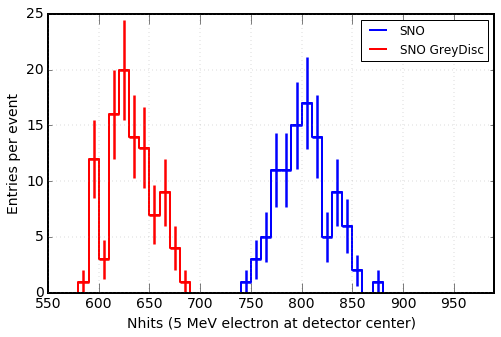

In [17]:
plotNhits([sno, snogd],[1., 1], ['SNO','SNO GreyDisc'], 
          'PBomb_SNO_official_vs_greydisc')

In [18]:
print 802.14/630.86
print 80214.0/63086

1.27150239356
1.27150239356


## Checking the hit times distribution

In [13]:
mycolors = ['b','r','g','k','m','c']
def plotTOA(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(30, 200, 1)#20, 4000)

    nbins = []
    for one_nhits in nhits_list:
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]
        print 'Mean ', one_n.mean()*scale_factor[i]
        print 'Std  ', one_n.std()*scale_factor[i]
        print 'Sum ', one_n.sum()
        
    plt.xlabel('Hit time (ns, 5 MeV electron at detector center)')
    plt.ylabel('Hits')        

    
    #plt.ylim([0,])
    plt.yscale('log')
    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SNO
Mean  467.75739645
Std   1622.1037386
Sum  79051
SNO GreyDisc
Mean  365.887573964
Std   1254.37033607
Sum  61835


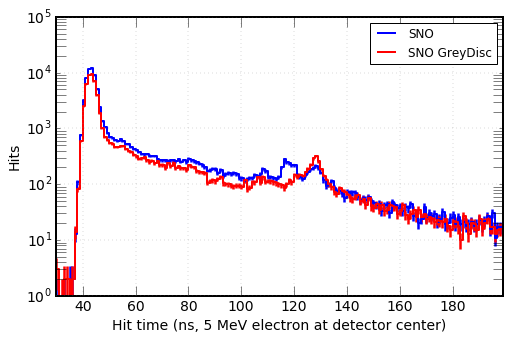

In [14]:
plotTOA([sno_hittimes, snogd_hittimes],[1., 1], ['SNO','SNO GreyDisc'], 
          'TOApbomb_SNO_official_vs_greydisc')

In [15]:
79051/61835.

1.278418371472467